# 移動平均線\_2曲線での利益最大化回帰

## アイデア
短期曲線が長期曲線を超える瞬間は**ゴールデンクロス**と呼ばれ、この瞬間に買うのが良いとされている。  
しかし、この短期曲線や長期曲線のパラメータ（何分前の平均か、近似度など）は最適化されていない。  
これを、利益が最大化するように回帰で求める。  

## +α
「短期曲線が長期曲線を超えたら買い」という単純なものでは、可視化した際に見づらかったり、
ブレが生じやすいことになってしまう懸念がある。


- 超える際の傾きの差
- 超える数分前に何回クロスしているか

などの売買条件をつけても良い。

In [1]:
from init import config
from config import change_db, check_is_dead_db
change_db("db_syunyooo")
check_is_dead_db()

config 読み込み -> config/config.ini
config 読み込み -> ../config/config.ini
changed db to db_syunyooo
section: db_default
[OK]: ServerName->db
section: db_syunyooo
[OK]: ServerName->syunyooo
section: db_db02
[OK]: ServerName->db02.wsl.mind.meiji.ac.jp
section: db
[OK]: ServerName->syunyooo


In [6]:
from simulator import Simulator
simulator = Simulator(sec_by=60 * 60 * 3)

2018-01-07 19:27:21,629 INFO sqlalchemy.engine.base.Engine DESCRIBE `SELECT * FROM ticker `
2018-01-07 19:27:21,631 INFO sqlalchemy.engine.base.Engine ()
2018-01-07 19:27:21,714 INFO sqlalchemy.engine.base.Engine SELECT * FROM ticker 
2018-01-07 19:27:21,717 INFO sqlalchemy.engine.base.Engine ()
data:2018-01-08 01:27:08.767000+09:00 - 2018-01-08 04:27:04.853000+09:00
samples:956


In [3]:
from simulator import AgentInterface

In [4]:
import pandas as pd
import enum
Status = enum.Enum("Status", "rise down")
class Agent_sma_ema_pd(AgentInterface):
    def __init__(self):
        self.ticker = pd.DataFrame()
        self.state = Status.rise
        
    def step(self, time, row_df):
        self.ticker = self.ticker.append(row_df.to_frame().T.drop(columns=["index"]))
#         if ticker.shape[0] < 10:
#             return "stay", 0
        # 分単位でgroup by的にまとめておく。
        ltp_min = self.ticker[["ltp"]].astype(dtype=float).groupby(pd.Grouper(freq='min')).mean()
        # SMA（単純移動平均 : Simple Moving Average）
        sma = ltp_min.rolling(window=8).mean()
        # EMA（指値平滑移動平均 : Exponentially Smoothed Moving Average）
        ema = ltp_min.ewm(span=30).mean()
        
        sma_tail = float(sma.tail(1).ltp)
        ema_tail = float(ema.tail(1).ltp)
        if sma_tail > ema_tail :
            if self.state is Status.down:
                print("{} golden cross!!!!!!!".format(time))
                self.state = Status.rise
                return "buy", 0.1
            state = Status.rise
        elif sma_tail < ema_tail:
            if self.state is Status.rise:
                print("{} dead cross!!!!!!!".format(time))
                self.state = Status.down
                return "sell", 0.1
            self.state = Status.down
        return "stay", 0

2018-01-08 01:35:06.803000+09:00 dead cross!!!!!!!
2018-01-08 02:11:03.667000+09:00 golden cross!!!!!!!
2018-01-08 02:14:40.067000+09:00 dead cross!!!!!!!
2018-01-08 02:25:03.720000+09:00 golden cross!!!!!!!
2018-01-08 02:30:06.210000+09:00 dead cross!!!!!!!
2018-01-08 02:31:39.363000+09:00 golden cross!!!!!!!
2018-01-08 02:37:06.903000+09:00 dead cross!!!!!!!
2018-01-08 03:03:10.020000+09:00 golden cross!!!!!!!
2018-01-08 03:32:53.360000+09:00 dead cross!!!!!!!
2018-01-08 03:37:05.770000+09:00 golden cross!!!!!!!
simulate done. plot...


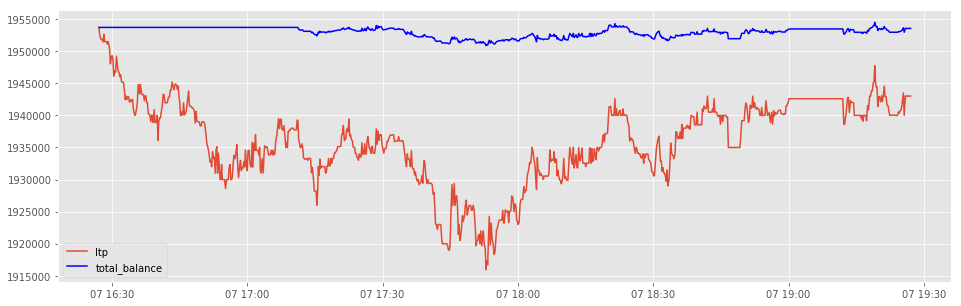

,action,amount,bitcoin,total,yen
2018-01-08 01:27:08.767000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:27:19.080000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:27:28.600000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:27:38.617000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:27:51.120000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:28:03.253000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:28:13.740000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:28:23.433000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:28:33.563000+09:00,stay,0.0,0.0,1953700.0,1953700.0
2018-01-08 01:28:47.727000+09:00,stay,0.0,0.0,1953700.0,1953700.0


In [7]:
simulator.simulate(agent=Agent_sma_ema_pd())

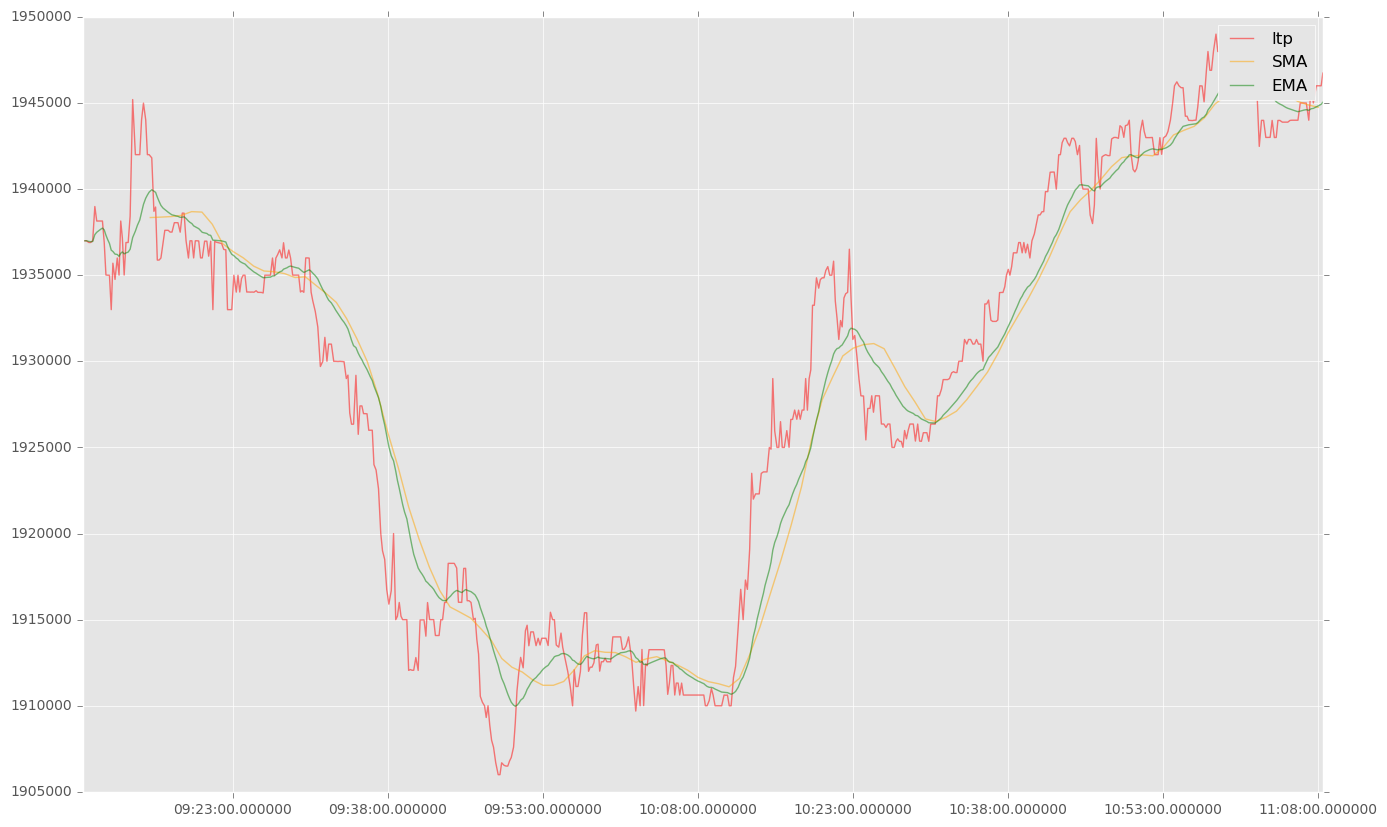

In [7]:
%matplotlib inline
import pandas as pd
from plotter.plot import plt, set_figure
set_figure((16,10))

#  元データ
ltp = simulator.ticker[["ltp"]].astype(dtype=float)
plt.plot(ltp, label="ltp", alpha=0.5, color="r")

# 指定の単位でgroup by的にまとめておく。
ltp_min = ltp.groupby(pd.Grouper(freq='min')).mean()
# plt.plot(ltp_min, label="ltp_min", alpha=0.5, color="purple")

# SMA（単純移動平均 : Simple Moving Average）
sma = ltp_min.rolling(window=8).mean() # 分
plt.plot(sma, label="SMA", alpha=0.5, color="orange")

# EMA（指値平滑移動平均 : Exponentially Smoothed Moving Average）
# EWMA（指数加重移動平均  ： Exponentially Weighted Moving Average）
ema = ltp.ewm(span=30).mean()
plt.plot(ema, label="EMA", alpha=0.5, color="green")

_ = plt.legend()